In [1]:
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

%matplotlib inline

In [2]:
filename = r'/mnt/c/Users/felix/OneDrive/WORK/2019ETH/Analysis/DTI_rawdata_for_ML.pkl'

# DTI.to_pickle()

DTI = pd.read_pickle(filename)
DTI.head()

,id,date,scan,segment,tissue,area,AD,FA,MD,RD,comments,BBB_day1,BBB_day84
0,194.0,20181119,40,C6,GM,3.690,0.383,0.379,0.266,0.208,NaN,20.0,21.0
1,194.0,20181119,40,C6,WM,6.615,0.603,0.738,0.292,0.137,NaN,20.0,21.0
2,194.0,20181119,24,T6,GM,1.598,0.459,0.532,0.272,0.179,NaN,20.0,21.0
3,194.0,20181119,24,T6,WM,5.400,0.737,0.843,0.315,0.104,NaN,20.0,21.0
4,194.0,20181119,24,T3,GM,1.778,0.423,0.512,0.258,0.176,NaN,20.0,21.0


In [3]:
# split labels from features

labels = DTI['BBB_day1']
del DTI['BBB_day1']
DTI.columns.values

array(['id', 'date', 'scan', 'segment', 'tissue', 'area', 'AD', 'FA',
       'MD', 'RD', 'comments', 'BBB_day84'], dtype=object)

In [4]:
# remove irrelevant features

drop_columns = ['date', 'scan', 'comments', 'id', 'BBB_day84']
DTI.drop(drop_columns, inplace=True, axis=1)

DTI.head()

,segment,tissue,area,AD,FA,MD,RD
0,C6,GM,3.690,0.383,0.379,0.266,0.208
1,C6,WM,6.615,0.603,0.738,0.292,0.137
2,T6,GM,1.598,0.459,0.532,0.272,0.179
3,T6,WM,5.400,0.737,0.843,0.315,0.104
4,T3,GM,1.778,0.423,0.512,0.258,0.176


In [5]:
# scale numerical values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical = ['area', 'AD', 'FA', 'MD', 'RD']

DTI_standard = pd.DataFrame(data = DTI)
DTI_standard[numerical] = scaler.fit_transform(DTI[numerical])

DTI_standard.head()

,segment,tissue,area,AD,FA,MD,RD
0,C6,GM,0.675560,-1.764298,-1.969897,-0.985708,1.376563
1,C6,WM,2.192009,-0.023278,0.141697,0.005475,0.040731
2,T6,GM,-0.409025,-1.162855,-1.069970,-0.756973,0.830942
3,T6,WM,1.562099,1.037161,0.759294,0.882291,-0.580148
4,T3,GM,-0.315705,-1.447749,-1.187607,-1.290687,0.774498


In [6]:
# dummy encoding

DTI_final = pd.get_dummies(DTI_standard)
del DTI_final['segment_T4-T5'] #after looking at result this columns seems useless

DTI_final.head()

,area,AD,FA,MD,RD,segment_C6,segment_T3,segment_T6,tissue_GM,tissue_WM,tissue_bottom,tissue_top
0,0.675560,-1.764298,-1.969897,-0.985708,1.376563,1,0,0,1,0,0,0
1,2.192009,-0.023278,0.141697,0.005475,0.040731,1,0,0,0,1,0,0
2,-0.409025,-1.162855,-1.069970,-0.756973,0.830942,0,0,1,1,0,0,0
3,1.562099,1.037161,0.759294,0.882291,-0.580148,0,0,1,0,1,0,0
4,-0.315705,-1.447749,-1.187607,-1.290687,0.774498,0,1,0,1,0,0,0


In [7]:
# split in training and teasting data
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DTI_final, 
                                                    labels, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 150 samples.
Testing set has 38 samples.


In [174]:
# fit and predict the data

from sklearn import linear_model
reg = linear_model.LinearRegression()   # R^2 = 0.12
# reg = linear_model.Ridge(alpha=.5)    # R^2 = 0.1
# reg = linear_model.Lasso(alpha=0.1)     # R^2 = 0.09
# reg = linear_model.LassoLarsCV(max_iter=10000)     # R^2 = 0.12
# reg = linear_model.SGDRegressor(max_iter=10000, penalty='l2')
# reg = linear_model.HuberRegressor()   # R^2 = 0.15

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(reg.coef_)

[  5.47842158 -55.58423214   6.47292858  31.12781811 -39.82138498
   2.1266683    3.60212457   5.57124961  -0.23095938  -8.88067192
   3.13004271   5.98158859]


In [171]:
from sklearn import svm

reg= svm.SVR(kernel='linear')
# reg= svm.SVR(kernel='poly', gamma='scale')
# reg= svm.SVR(kernel='rbf', gamma='scale')

reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)


In [177]:
from sklearn import ensemble
# reg = ensemble.ExtraTreesRegressor(n_estimators=1000, max_depth=1000, max_features=0.3)
reg = ensemble.RandomForestRegressor(n_estimators=1000, max_depth=100, max_features = 0.5)


# from sklearn import neural_network
# reg = neural_network.MLPRegressor(solver = 'adam', max_iter=10000, hidden_layer_sizes=(100, ),alpha=0.001, learning_rate='adaptive')

reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

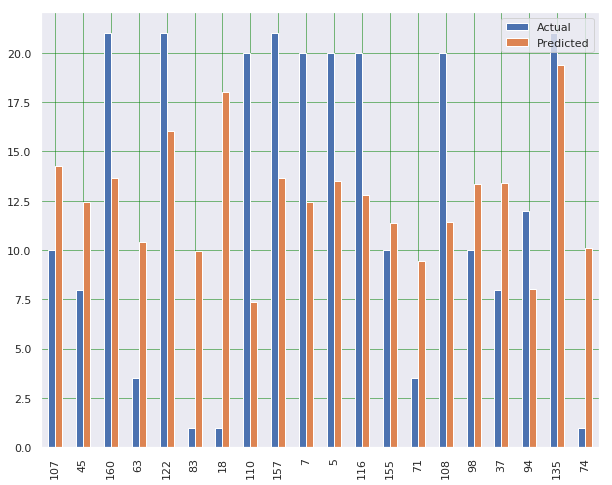

Mean Absolute Error: 5.899342105263157
Mean Squared Error: 49.313870605263155
Root Mean Squared Error: 7.022383541594916
R^2: -0.05965720594789414


In [178]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(20)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test,y_pred))



-0.05965720594789414

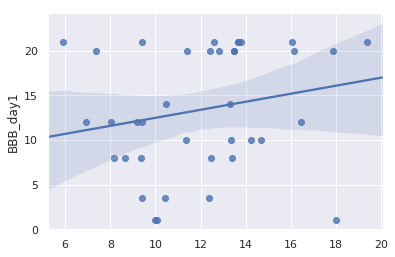

In [179]:
# evaluate model

import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as ss

from sklearn.metrics import r2_score

ax = sns.regplot(x=y_pred, y=y_test)
# print(ss.pearsonr(y_pred,y_test))

r2_score(y_test,y_pred)